## Final Project Submission

Please fill out:
* Student name: MUTUA MUKARIA BONFACE
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# 1. BUSINESS UNDERSTANDING

#### 1.1. UNDERSTANDING THE PROBLEM

The role assumed here is for a data scientist outsourced by house owners in the county. This project intends to give them a way forward on what specific factors they should majorly consider while investing in houses. Like all other business persons, these stakeholders want to make the best out of their investment. They must sell their houses at the highest price possible for maximum profit. However, this goes down to the factors that hugely dictate the price of houses and spend more on bettering some of these vital features. 

For instance, one would pay more for a two bedroom relative to a one bedroom out of the increase in bedrooms factor. This project seeks to bring together quite several factors that matter in increasing or decreasing the price of houses for their look out while renovating or building houses. It seeks to answer the question, what increase or decrease in the price of houses does the addition of a single feature to a house cause?

#### 1.2. PROBLEM STATEMENT

The problem in this project is finding out what features matter in increasing or reducing the prices of houses. If a factor affects, to what extent does an increase in one unit of the feature have to the price of a house? 

# 2. DATA UNDERSTANDING

#### 2.1 DATA COLLECTION

This project uses data from King County House Sales. The data is provided for this project as kc_house_data.csv

#### Loading the data

In [2]:
# Import the relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = pd.read_csv('data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


#### 2.2 DATA DESCRIPTION

|Column|        |Description|
|------|        |-----------|
|id|            |Unique identifier for a house| 
|date|          |Date house was sold|
|price|         |Sale price (prediction target)|
|bedrooms|      |Number of bedrooms|
|bathrooms|     |Number of bathrooms|
|sqft_living|   |Square footage of living space in the home|
|sqft_lot|      |Square footage of the lot|
|floors|        |Number of floors (levels) in house|
|waterfront|    |Whether the house is on a waterfront|
|view|          |Quality of view from house|
|condition|     |How good the overall condition of the house is. Related to maintenance of house|
|grade|         |Overall grade of the house. Related to the construction and design of the house|
|sqft_above|    |Square footage of house apart from basement|
|sqft_basement| |Square footage of the basement|
|yr_built|      |Year when house was built|
|yr_renovated|  |Year when house was renovated|
|zipcode|       |ZIP Code used by the United States Postal Service|
|lat|           |Latitude coordinate|
|long|          |Longitude coordinate|
|sqft_living15| |The square footage of interior housing living space for the nearest 15 neighbors|
|sqft_lot15|    |The square footage of the land lots of the nearest 15 neighbors|

In [3]:
# data frame description
data.describe(include = 'all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221,21534,...,21597,21597.000000,21597,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,2,5,...,11,NaN,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,6/23/2014,NaN,NaN,NaN,NaN,NaN,NaN,NO,NONE,...,7 Average,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,19075,19422,...,8974,NaN,12826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580474e+09,NaN,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,NaN,NaN,...,NaN,1788.596842,NaN,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,NaN,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,NaN,NaN,...,NaN,827.759761,NaN,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,NaN,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,NaN,NaN,...,NaN,370.000000,NaN,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,NaN,NaN,...,NaN,1190.000000,NaN,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,NaN,NaN,...,NaN,1560.000000,NaN,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,NaN,NaN,...,NaN,2210.000000,NaN,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


#### 2.3 SAMPLING STRATEGY

#### 2.3.1. TARGET POPULATION 

The target population for this project are the people living within the King County. The dataset contains more than sufficient information on whatever any house client would look into while purchasing or renting a house within this county. 

#### 2.3.2. SAMPLING METHOD 

As noted earlier on, this project uses data from King County House Sales. However, it contains several columns some of which are irrelevant in drawing the project's deductions. Thus, not all these columns are useable. The columns useable in this case trickle down to the data scientist's view on what is vitaly essential for home searchers in their quest of deciding in which house to settle on for residing purposes. 

#### 2.3.3. SAMPLE FRAME AND SIZE

Regarding the above statement, several columns in this dataset will be vital in making significant deductions from this project. The price which is the dependent variale in this case leads the line along with several others including, bedrooms, bathrooms, sqft-living, sqft-lot, waterfront, condition, grade, yr_built that are all possible independent variables of this project.

However, there is no certainity whether these all columns will be incusive in our model as some of them maybe subject to dropping at the data cleaning stage of the project. Others may be added at the last parts of the project in an attempt to make the model a better predictor in the variances of housing prices.


#### 2.4 DESCRIBING THE QUESTION 

#### 2.4.1. SPECIFYING THE QUESTION 

To what extent do different factors affect the housing prices. 

$H_0$: The different factors affecting pricing have the same weight of impact on pricing. 

$H_1$: The different factors affecting pricing have different weight of impact on pricing. 

#### 2.4.2. DEFINING THE METRIC FOR SUCCESS

This project will be deemed a success if the null hypothesis fails and in return rejected. 

# 3. DATA PREPARATION 

#### 3.1. SELECTING DATA

We will use the columns with no null values from the chosen columns. These data sets will be recognized as df for this case. 

#### 3.2. DATA CLEANING 

The waterfront and yr_renovated columns are worth dropping

In [4]:
# loading the relevant dataset
df = data[['price' , 'bedrooms' , 'bathrooms' , 'sqft_living' , 'sqft_lot' , 'view' , 'grade']]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade
0,221900.0,3,1.00,1180,5650,NONE,7 Average
1,538000.0,3,2.25,2570,7242,NONE,7 Average
2,180000.0,2,1.00,770,10000,NONE,6 Low Average
3,604000.0,4,3.00,1960,5000,NONE,7 Average
4,510000.0,3,2.00,1680,8080,NONE,8 Good


In [5]:
# checking for missing values 
df.isnull()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False


There are missing values in the chosen dataset. So we further explore to check which column contain null values. 

In [6]:
# checking which column contains missing values
df.isnull().any()

price          False
bedrooms       False
bathrooms      False
sqft_living    False
sqft_lot       False
view            True
grade          False
dtype: bool

In [7]:
# Checking the number of missing values in the said waterfront column above.
df.isna().sum()

price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
view           63
grade           0
dtype: int64

The view column is the only column with missing values in this chosen dataset. It is a vital column in this dataset since it is one of the columns with categorical values that should be included in the project. 


In [8]:
# Checking the mode of the column 
df['view'].mode()

0    NONE
Name: view, dtype: object

In [9]:
df['view'].fillna(df['view'].mode() , inplace = True)
df

C:\Users\faith\AppData\Local\Temp\ipykernel_7088\3270057045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['view'].fillna(df['view'].mode() , inplace = True)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade
0,221900.0,3,1.00,1180,5650,NONE,7 Average
1,538000.0,3,2.25,2570,7242,NONE,7 Average
2,180000.0,2,1.00,770,10000,NONE,6 Low Average
3,604000.0,4,3.00,1960,5000,NONE,7 Average
4,510000.0,3,2.00,1680,8080,NONE,8 Good
...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,NONE,8 Good
21593,400000.0,4,2.50,2310,5813,NONE,8 Good
21594,402101.0,2,0.75,1020,1350,NONE,7 Average
21595,400000.0,3,2.50,1600,2388,NONE,8 Good


A further exploration of the data reveals bathroom is in float which does not make sense. We cannot have 2.25 bathrooms as the data depicts. Thus, there is a need to rectify this before rendering our data clean.

In [10]:
df['bathrooms'] = df.bathrooms.astype(int)
df

C:\Users\faith\AppData\Local\Temp\ipykernel_7088\800352885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bathrooms'] = df.bathrooms.astype(int)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade
0,221900.0,3,1,1180,5650,NONE,7 Average
1,538000.0,3,2,2570,7242,NONE,7 Average
2,180000.0,2,1,770,10000,NONE,6 Low Average
3,604000.0,4,3,1960,5000,NONE,7 Average
4,510000.0,3,2,1680,8080,NONE,8 Good
...,...,...,...,...,...,...,...
21592,360000.0,3,2,1530,1131,NONE,8 Good
21593,400000.0,4,2,2310,5813,NONE,8 Good
21594,402101.0,2,0,1020,1350,NONE,7 Average
21595,400000.0,3,2,1600,2388,NONE,8 Good


At this point, our data is clean and can be used in making predictions.

Cleaning ensures, validity, uniformity, consistency, and accuracy of the project's results. From here, cleandf remains the dataframe to be used. 

# 4. DATA ANALYSIS

#### 4.1 EXPLORATORY DATA ANALYSIS 

#### 4.1.1. UNIVARIATE DATA ANALYSIS

#### a. Numerical

In [11]:
# Dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  int32  
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   view         21534 non-null  object 
 6   grade        21597 non-null  object 
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 1.1+ MB


#### Checking for outliers in the useable dataset. 

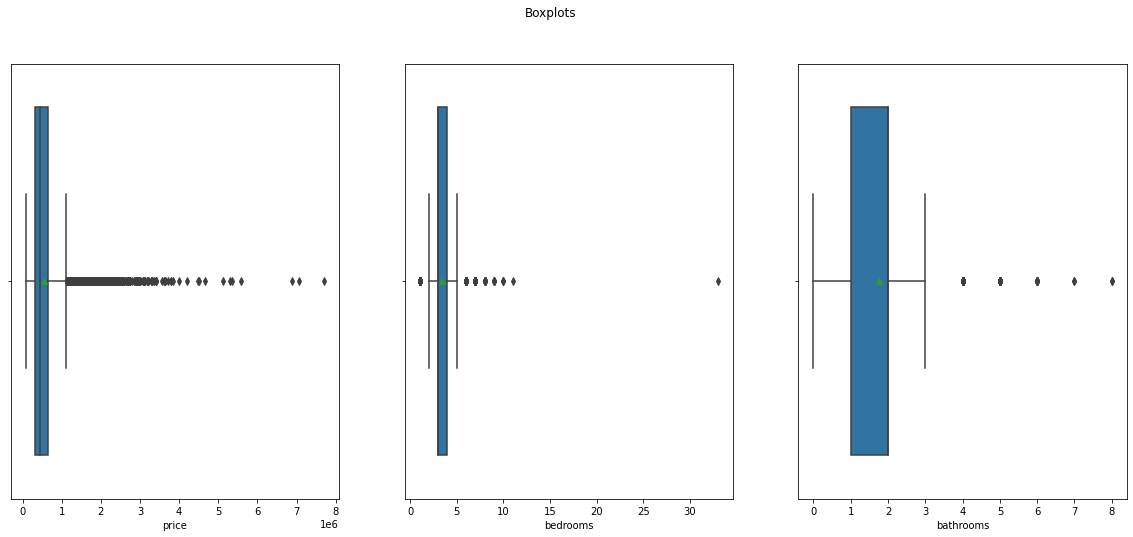

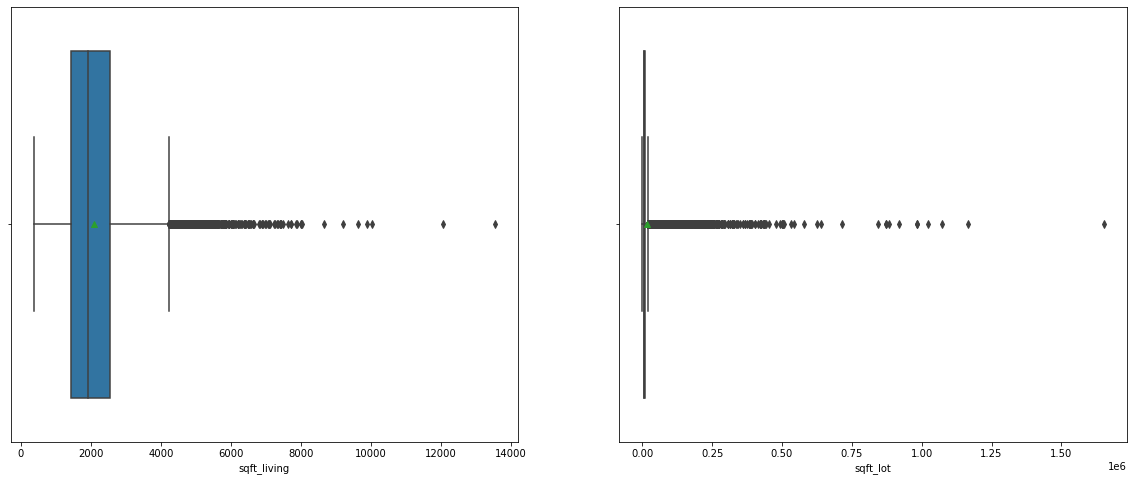

In [12]:
#outliers
import seaborn as sns
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20, 8))
fig.suptitle('Boxplots')
sns.boxplot(x = df['price'], ax=ax1, showmeans = True)
sns.boxplot(x = df['bedrooms'], ax=ax2, showmeans = True)
sns.boxplot(x = df['bathrooms'], ax=ax3, showmeans = True)

fig, (ax4,ax5) = plt.subplots(1,2, figsize=(20, 8))
sns.boxplot(x = df['sqft_living'], ax=ax4, showmeans = True)
sns.boxplot(x = df['sqft_lot'], ax=ax5, showmeans = True)
plt.show()


The above boxplots indicates that the datasets have alot of outliers. 

In [13]:
# Checking for Outliers

Q1_price = df['price'].quantile(.25)
Q3_price = df['price'].quantile(.75)

IQR_price = Q3_price - Q1_price


anomalies = df[(df.price < Q1_price - 1.5* IQR_price)  |
                    (df.price > Q3_price + 1.5 * IQR_price) ]
print('prices outliers are: ' + str(anomalies.price.count()))

Q1_bedrooms = df['bedrooms'].quantile(.25)
Q3_bedrooms = df['bedrooms'].quantile(.75)

IQR_bedrooms = Q3_bedrooms - Q1_bedrooms


anomalies = df[(df.bedrooms < Q1_bedrooms - 1.5* IQR_bedrooms)  |
                    (df.bedrooms > Q3_bedrooms + 1.5 * IQR_bedrooms) ]
print('bedrooms outliers are: ' + str(anomalies.bedrooms.count()))

Q1_bathrooms = df['bathrooms'].quantile(.25)
Q3_bathrooms = df['bathrooms'].quantile(.75)

IQR_bathrooms = Q3_bathrooms - Q1_bathrooms


anomalies = df[(df.bathrooms < Q1_bathrooms - 1.5* IQR_bathrooms)  |
                    (df.bathrooms > Q3_bathrooms + 1.5 * IQR_bathrooms) ]
print('bathrooms outliers are: ' + str(anomalies.bathrooms.count()))

Q1_sqft_living = df['sqft_living'].quantile(.25)
Q3_sqft_living = df['sqft_living'].quantile(.75)

IQR_sqft_living = Q3_sqft_living - Q1_sqft_living


anomalies = df[(df.sqft_living < Q1_sqft_living - 1.5* IQR_sqft_living)  |
                    (df.sqft_living > Q3_sqft_living + 1.5 * IQR_sqft_living) ]
print('sqft_living outliers are: ' + str(df.sqft_living.count()))

Q1_sqft_lot = df['sqft_lot'].quantile(.25)
Q3_sqft_lot = df['sqft_lot'].quantile(.75)

IQR_sqft_lot = Q3_sqft_lot - Q1_sqft_lot


anomalies = df[(df.sqft_lot < Q1_sqft_lot - 1.5* IQR_sqft_lot)  |
                    (df.sqft_lot > Q3_sqft_lot + 1.5 * IQR_sqft_lot) ]
print('sqft_lot outliers are: ' + str(anomalies.sqft_lot.count()))

prices outliers are: 1158
bedrooms outliers are: 530
bathrooms outliers are: 402
sqft_living outliers are: 21597
sqft_lot outliers are: 2419


Going by the numbers of the outliers, they are too many to be dropped. Dropping them will affect the data analysis deductions going forward. Thus, retaining them is not only a neccessity but a need.

#### b. Categorical

<AxesSubplot:>

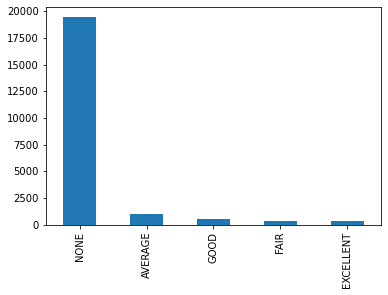

In [14]:
df.view.value_counts().plot.bar()

The majority of the houses are in averange condition. 

<AxesSubplot:>

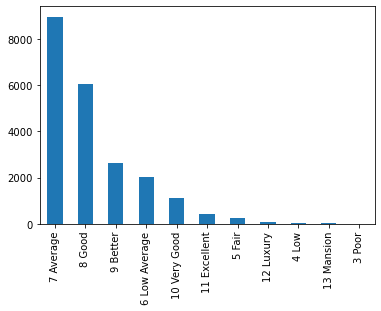

In [15]:
df.grade.value_counts().plot.bar()

The houses are rated 7 Average in grades. 

#### c. Summary

In [16]:
# Checking the data description 
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,5.402966e+05,3.373200,1.750660,2080.321850,1.509941e+04
std,3.673681e+05,0.926299,0.734042,918.106125,4.141264e+04
min,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02
25%,3.220000e+05,3.000000,1.000000,1430.000000,5.040000e+03
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06


#### 4.1.2. BIVARIATE DATA ANALYSIS 

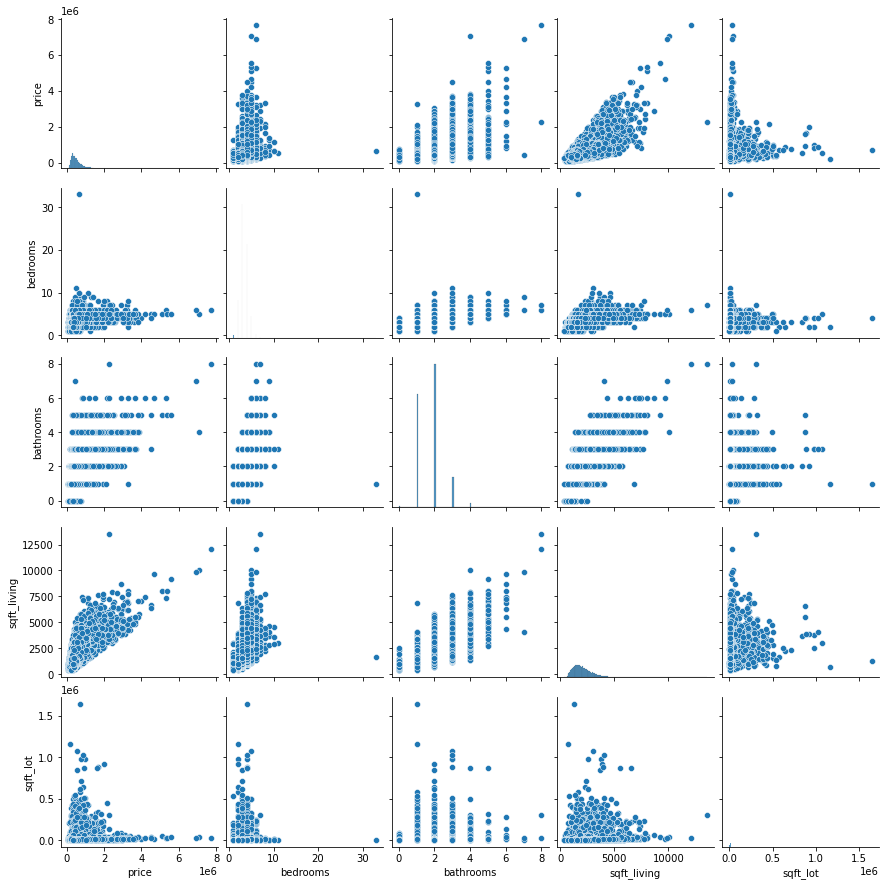

In [17]:
# Checking the relationship between two variables for the chosen dataset
sns.pairplot(df)
plt.show()

Some of these varaibles are correlated while others are not. 

#### 4.1.3. MULTIVARIATE ANALYSIS

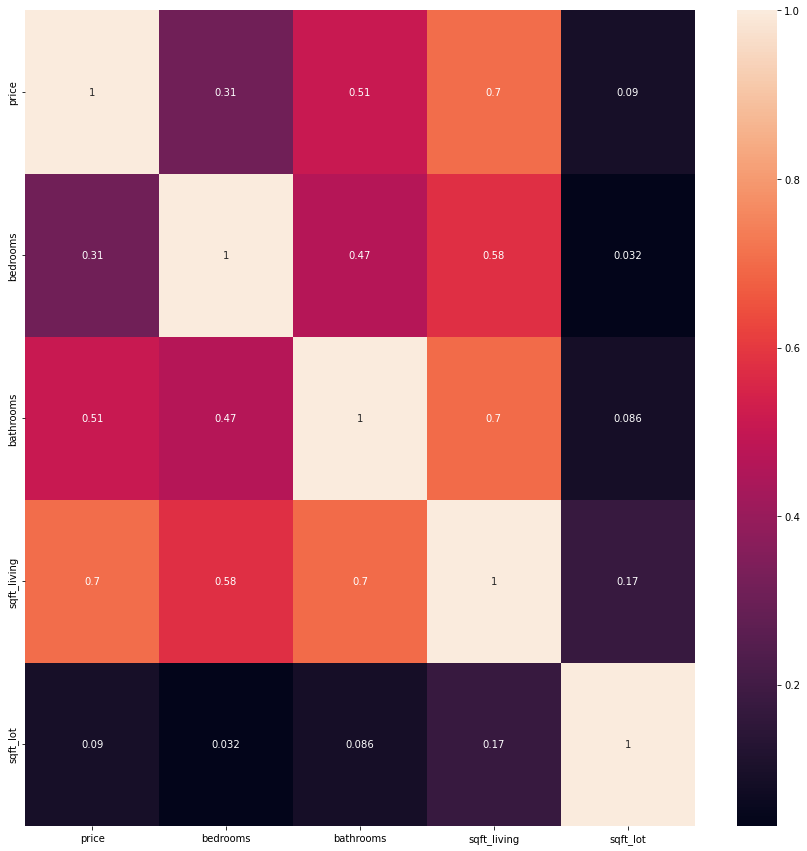

In [18]:
# Further to density visualization
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [19]:
# checking the overall correlation of price with all independent variables
df.corr()['price']

price          1.000000
bedrooms       0.308787
bathrooms      0.510631
sqft_living    0.701917
sqft_lot       0.089876
Name: price, dtype: float64

#### a. Simple linear regression model

This part will contain the linear regression part and model of this project. As stated earlier, the price is the dependent variabe in this project while all others are independent variables. Out of the list of independent variables, this section uses the sqft_living of a house to check its dictation on the price of a house. It is one of the most positively correlated with the price. 

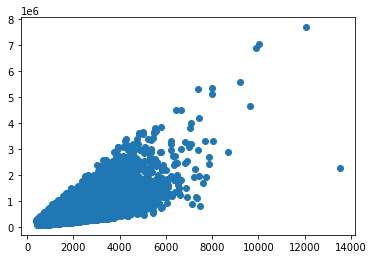

In [20]:
# checking correlation between the independent and dependent variables
y_simple = df['price']
X_simple = df['sqft_living']
plt.scatter(X_simple, y_simple)

The graph above shows a positive correlation between the price of a house and sqft_living. From here, the project goes further to explore the extent of the dictation. 

In [21]:
# Linear regression model formulation 
simple_model = sm.OLS(y_simple, sm.add_constant(X_simple))
# fitting the model
simple_results = simple_model.fit()

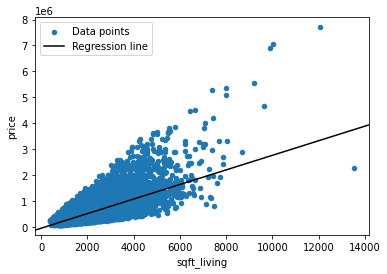

In [22]:
# plotting he regression line
x = X_simple
y = y_simple
fig, ax = plt.subplots()
df.plot.scatter(x = 'sqft_living' , y = 'price' , label = 'Data points' , ax = ax)
sm.graphics.abline_plot(model_results = simple_results, label = 'Regression line', ax = ax , color = 'black')
ax.legend();

In [23]:
# Linear_model results summary
print(simple_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        05:54:00   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

#### Model Interpretations 

From the model results. The equation in for this stands as.
y = mx + c

From the table above, y = 280.8630sqft_living - 43990

This model is statistically significant in that the F-statistic is below the threshold p_value 0.05. Thus, we fail to reject the null hypothesis which in this case is by default 'the two variables are not dependent on each other' and conclude that the two variables are dependent on each other. 

The model explains about 49% of the variance in the price of houses. 

For a house with zero sqft_living, there would be a drop in its price by $43990.

An increase in sqft_living by 1 unit would result to an alternative increase in the price of the house by $281

In [24]:
# The next step deals with categorical variables
# we check the type of data in our dataset to know the categorical variables in this case. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  int32  
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   view         21534 non-null  object 
 6   grade        21597 non-null  object 
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 1.1+ MB


There is a revelation that condition and grade are the available categorical columns in this dataset.

In [25]:
# Further exploration on the nature of data. To know all the existing categorical variables.
pd.get_dummies(df)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,3,1,1180,5650,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2,2570,7242,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1,770,10000,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3,1960,5000,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2,1680,8080,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2,1530,1131,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
21593,400000.0,4,2,2310,5813,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
21594,402101.0,2,0,1020,1350,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
21595,400000.0,3,2,1600,2388,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [26]:
# using pandas to one-hot encode on the identified dataframes that are categorical 
pd.get_dummies(df, columns = ['view' , 'grade'])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,3,1,1180,5650,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2,2570,7242,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1,770,10000,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3,1960,5000,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2,1680,8080,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2,1530,1131,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
21593,400000.0,4,2,2310,5813,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
21594,402101.0,2,0,1020,1350,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
21595,400000.0,3,2,1600,2388,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [27]:
# Checking distributions in numbers
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

<AxesSubplot:xlabel='view'>

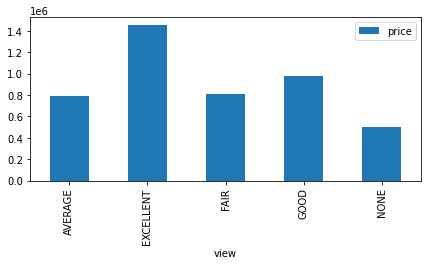

In [28]:
# Visualizing the distributions
fig, ax = plt.subplots(figsize = (7 , 3))
df.groupby('view').mean().plot.bar(y = 'price' , ax =ax)

In [29]:
# checking distributionsin numbers
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade'>

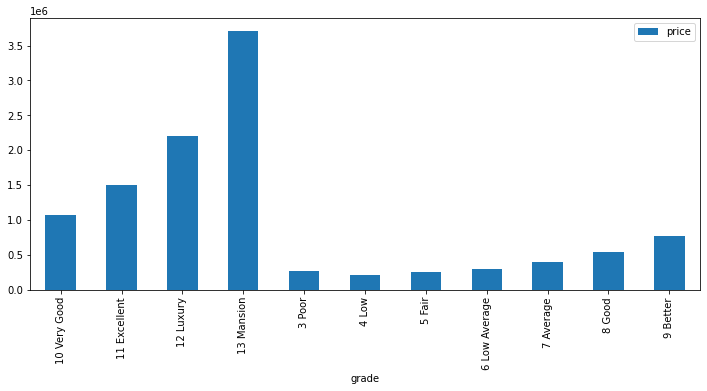

In [30]:
fig, ax = plt.subplots(figsize = (12, 5))
df.groupby('grade').mean().plot.bar(y = 'price' , ax =ax)

The names very good, excellent, mansion, poor, low, fair, low average, good, and better all imply the grades as per rating of the house consitions. 

However, both the grade and condition and grade coulmns of the houses seem to be representing the same thing, the nature of the house. For this reason, the project drops the condition categorical column and utilizes the grade column.

#### CATEGORICAL VARIABLES INCLUSION - ONE-HOT ENCODING

In [31]:
# Addition of the condition categorical variable to the initial simple model
X_iterated = df[['sqft_living' , 'view']]
X_iterated

,sqft_living,view
0,1180,NONE
1,2570,NONE
2,770,NONE
3,1960,NONE
4,1680,NONE
...,...,...
21592,1530,NONE
21593,2310,NONE
21594,1020,NONE
21595,1600,NONE


In [32]:
X_iterated = pd.get_dummies(X_iterated, columns=['view'])
X_iterated

,sqft_living,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,1180,0,0,0,0,1
1,2570,0,0,0,0,1
2,770,0,0,0,0,1
3,1960,0,0,0,0,1
4,1680,0,0,0,0,1
...,...,...,...,...,...,...
21592,1530,0,0,0,0,1
21593,2310,0,0,0,0,1
21594,1020,0,0,0,0,1
21595,1600,0,0,0,0,1


In [33]:
X_iterated.drop("view_NONE", axis=1, inplace=True)
X_iterated

,sqft_living,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD
0,1180,0,0,0,0
1,2570,0,0,0,0
2,770,0,0,0,0
3,1960,0,0,0,0
4,1680,0,0,0,0
...,...,...,...,...,...
21592,1530,0,0,0,0
21593,2310,0,0,0,0
21594,1020,0,0,0,0
21595,1600,0,0,0,0


In [34]:
iterated_model = sm.OLS(y_simple, sm.add_constant(X_iterated))
iterated_results = iterated_model.fit()

In [35]:
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     5126.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        05:54:03   Log-Likelihood:            -2.9894e+05
No. Observations:               21597   AIC:                         5.979e+05
Df Residuals:                   21591   BIC:                         5.979e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.567e+04   4231.324     -3.

#### model interpretation

This model is statistically significant out of its attained f statistic < 0.05.

From the one-hot encoding, view_None is the reference category, thus, the interpretation of the other four parameters of view created have to refer to this category. Regarding this; 

compared to the NO view, there is an increase in the price of houses by 127000 for a house with average view holding all other factors constant. 

The case is no different for the others. That is, compared to the NO view, there is a respective increase in the price of houses by 612700, 169500, and 215000 for a house with excellent, fair and good views holding all other factors constant. 

like in the initial model, An increase in sqft_living by 1 unit would result to an alternative increase in the price of the house by $281

#### multiple linear regression model

In [36]:
# Formulating the dependent and independent variables of our model
y_multiple = df['price']
X_multiple = df[['bedrooms' , 'bathrooms' , 'sqft_living' , 'view' , 'grade']]

In [37]:
# Getting dummies
X_multiple = pd.get_dummies(X_multiple, columns=['view' , 'grade'], drop_first = True)
X_multiple

,bedrooms,bathrooms,sqft_living,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,3,1,1180,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,3,2,2570,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,2,1,770,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,4,3,1960,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,3,2,1680,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2,1530,0,0,0,1,0,0,0,0,0,0,0,0,1,0
21593,4,2,2310,0,0,0,1,0,0,0,0,0,0,0,0,1,0
21594,2,0,1020,0,0,0,1,0,0,0,0,0,0,0,1,0,0
21595,3,2,1600,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [38]:
# setting reference categories
X_multiple.drop(["view_NONE" , 'grade_3 Poor'], axis=1, inplace=True)
X_multiple

,bedrooms,bathrooms,sqft_living,view_EXCELLENT,view_FAIR,view_GOOD,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,3,1,1180,0,0,0,0,0,0,0,0,0,1,0,0
1,3,2,2570,0,0,0,0,0,0,0,0,0,1,0,0
2,2,1,770,0,0,0,0,0,0,0,0,1,0,0,0
3,4,3,1960,0,0,0,0,0,0,0,0,0,1,0,0
4,3,2,1680,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2,1530,0,0,0,0,0,0,0,0,0,0,1,0
21593,4,2,2310,0,0,0,0,0,0,0,0,0,0,1,0
21594,2,0,1020,0,0,0,0,0,0,0,0,0,1,0,0
21595,3,2,1600,0,0,0,0,0,0,0,0,0,0,1,0


In [39]:
multiple_model = sm.OLS(y_multiple, sm.add_constant(X_multiple))
multiple_results = multiple_model.fit()
# Multiple results
print(multiple_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     2325.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        05:54:04   Log-Likelihood:            -2.9701e+05
No. Observations:               21597   AIC:                         5.940e+05
Df Residuals:                   21581   BIC:                         5.942e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.213e+05   1

#### model interpretations

This model is a plus relative to the previous one as it explains about 62% of the variances in the prices of houses in this county. 

This model is statistically significant out of its low F statistic < 0.05. Also, the individual parameters included are statistically significant. 

This model predicts that a house lacking all the defined parameters in the model would still sell at 521300.

An increase in one bathroom of a house leads to an 12310 alternative increase in house price all other factors held constant. 

For the grading, grade 3 poor is the reference category. The rest of the garde's interpretation refer to this category to explain their variance to the house prices.

For instance, compared to the Poor grade, there is an increase in the price of houses by 264,400 for a house with excellent grade holding all other factors constant. 


Although the model is statistically significant in its attained p_value of 0.00 < 0.05, it is not a good predictor of the variances in the price of houses. Such a low level model signifies an exclusion of some of the key predictors of the house prices. Thus, we can better it by adding some of the ommitted variables. 

#### improved model

In [40]:
data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [41]:
y = data['price']

In [42]:
X = data[['bedrooms' , 'bathrooms' , 'sqft_living' , 'sqft_lot' , 'floors' , 'view' , 'grade' , 'sqft_above' , 
         'sqft_living15' , 'sqft_lot15']]
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,NONE,7 Average,1180,1340,5650
1,3,2.25,2570,7242,2.0,NONE,7 Average,2170,1690,7639
2,2,1.00,770,10000,1.0,NONE,6 Low Average,770,2720,8062
3,4,3.00,1960,5000,1.0,NONE,7 Average,1050,1360,5000
4,3,2.00,1680,8080,1.0,NONE,8 Good,1680,1800,7503


In [43]:
X['bathrooms'] = X.bathrooms.astype(int)
X

C:\Users\faith\AppData\Local\Temp\ipykernel_7088\2729771656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bathrooms'] = X.bathrooms.astype(int)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_living15,sqft_lot15
0,3,1,1180,5650,1.0,NONE,7 Average,1180,1340,5650
1,3,2,2570,7242,2.0,NONE,7 Average,2170,1690,7639
2,2,1,770,10000,1.0,NONE,6 Low Average,770,2720,8062
3,4,3,1960,5000,1.0,NONE,7 Average,1050,1360,5000
4,3,2,1680,8080,1.0,NONE,8 Good,1680,1800,7503
...,...,...,...,...,...,...,...,...,...,...
21592,3,2,1530,1131,3.0,NONE,8 Good,1530,1530,1509
21593,4,2,2310,5813,2.0,NONE,8 Good,2310,1830,7200
21594,2,0,1020,1350,2.0,NONE,7 Average,1020,1020,2007
21595,3,2,1600,2388,2.0,NONE,8 Good,1600,1410,1287


In [44]:
X = pd.get_dummies(X, columns=['view' , 'grade'], drop_first = True)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15,view_EXCELLENT,view_FAIR,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,3,1,1180,5650,1.0,1180,1340,5650,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,2,2570,7242,2.0,2170,1690,7639,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,1,770,10000,1.0,770,2720,8062,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,3,1960,5000,1.0,1050,1360,5000,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3,2,1680,8080,1.0,1680,1800,7503,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2,1530,1131,3.0,1530,1530,1509,0,0,...,0,0,0,0,0,0,0,0,1,0
21593,4,2,2310,5813,2.0,2310,1830,7200,0,0,...,0,0,0,0,0,0,0,0,1,0
21594,2,0,1020,1350,2.0,1020,1020,2007,0,0,...,0,0,0,0,0,0,0,1,0,0
21595,3,2,1600,2388,2.0,1600,1410,1287,0,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
X.drop(["view_NONE" , 'grade_3 Poor'], axis=1, inplace=True)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15,view_EXCELLENT,view_FAIR,view_GOOD,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,3,1,1180,5650,1.0,1180,1340,5650,0,0,0,0,0,0,0,0,0,1,0,0
1,3,2,2570,7242,2.0,2170,1690,7639,0,0,0,0,0,0,0,0,0,1,0,0
2,2,1,770,10000,1.0,770,2720,8062,0,0,0,0,0,0,0,0,1,0,0,0
3,4,3,1960,5000,1.0,1050,1360,5000,0,0,0,0,0,0,0,0,0,1,0,0
4,3,2,1680,8080,1.0,1680,1800,7503,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2,1530,1131,3.0,1530,1530,1509,0,0,0,0,0,0,0,0,0,0,1,0
21593,4,2,2310,5813,2.0,2310,1830,7200,0,0,0,0,0,0,0,0,0,0,1,0
21594,2,0,1020,1350,2.0,1020,1020,2007,0,0,0,0,0,0,0,0,0,1,0,0
21595,3,2,1600,2388,2.0,1600,1410,1287,0,0,0,0,0,0,0,0,0,0,1,0


In [46]:
improved_model = sm.OLS(y, sm.add_constant(X))
improved_results = improved_model.fit()
# Multiple results
print(improved_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     1800.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        05:54:05   Log-Likelihood:            -2.9679e+05
No. Observations:               21597   AIC:                         5.936e+05
Df Residuals:                   21576   BIC:                         5.938e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.466e+05   1

#### Model Interpretations

This model represents an improved model from the previous one depicting almost 63% of the variances in the price of houses within the county. 

The F statitics fo this model is lower than the standard p_value 0.05 signifying its statistical significance. 

Almost all other parameters of the model are statistically significant apart from the sqft_lot and floors as they exceed the standard 0.05. 



#### More Preciseness

In [71]:
# removing the statistically insignificant columns
modifieddf = data[['price' , 'bedrooms' , 'sqft_living' , 'sqft_living15' , 'sqft_lot15' , 'view' , 'grade']]
modifieddf.head(2)

,price,bedrooms,sqft_living,sqft_living15,sqft_lot15,view,grade
0,221900.0,3,1180,1340,5650,NONE,7 Average
1,538000.0,3,2570,1690,7639,NONE,7 Average


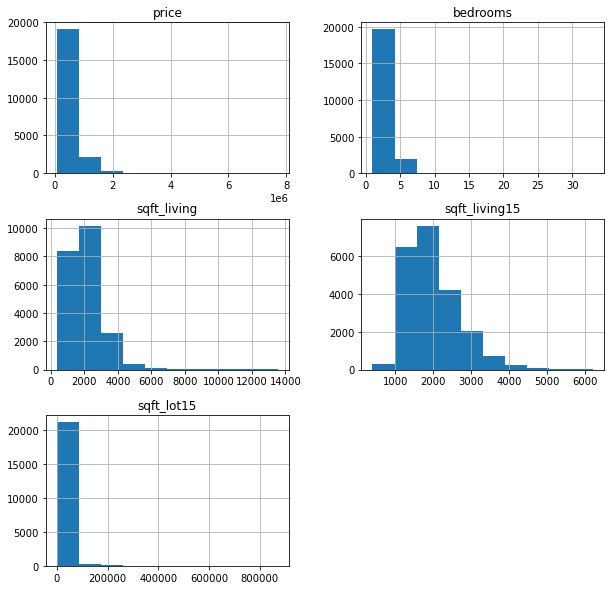

In [72]:
# plotting to check for normal distribution
data[['price' , 'bedrooms' , 'sqft_living' , 'sqft_living15' , 
      'sqft_lot15' , 'view' , 'grade']].hist(figsize = (10, 10));

The data is not normally distributed which would be the source of the identified errors in teh above model. So we seek to make it normally distributed through the log function transformation as illustrated below.

In [73]:
import warnings
warnings.filterwarnings('ignore')
modifieddf[['nprice' , 
            'nbedrooms' , 
            'nsqft_living' ,  
            'nsqft_living15' , 
            'nsqft_lot15']] = np.log(modifieddf[['price' , 
                                                 'bedrooms' ,
                                                 'sqft_living' , 
                                                 'sqft_living15' , 
                                                 'sqft_lot15']])
modifieddf.head(2)

,price,bedrooms,sqft_living,sqft_living15,sqft_lot15,view,grade,nprice,nbedrooms,nsqft_living,nsqft_living15,nsqft_lot15
0,221900.0,3,1180,1340,5650,NONE,7 Average,12.309982,1.098612,7.073270,7.200425,8.639411
1,538000.0,3,2570,1690,7639,NONE,7 Average,13.195614,1.098612,7.851661,7.432484,8.941022


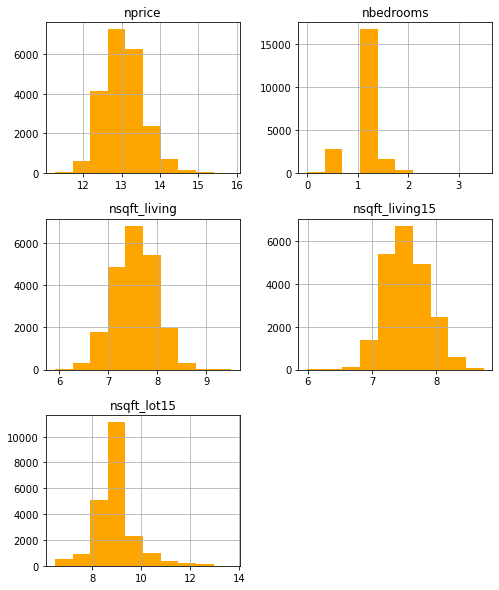

In [74]:
# visualizing to ensure normal distribution 
modifieddf[['nprice' , 'nbedrooms' , 'nsqft_living' , 'nsqft_living15' , 
             'nsqft_lot15']].hist(figsize = (8, 10) , color = 'orange');

PERFECT, these data is normally distributed.

In [75]:
# Taking the data with n at the front that signifies its normal distribution. 
modifieddf[['nprice' , 
            'nbedrooms' , 
            'nsqft_living' ,  
            'nsqft_living15' , 
            'nsqft_lot15' , 
            'view']].head(1)
# Modelling with this data 
y_m = modifieddf['nprice']
X_m = modifieddf[['nsqft_living' , 
                  'nbedrooms',
                  'nsqft_living15' , 
                  'nsqft_lot15' , 
                  'view' , 
                  'grade']]
X_m.head(1)

,nsqft_living,nbedrooms,nsqft_living15,nsqft_lot15,view,grade
0,7.07327,1.098612,7.200425,8.639411,NONE,7 Average


In [76]:
# Getting dummies through one-hot encoding
X_m = pd.get_dummies(X_m, columns = ['view' , 'grade'], drop_first = True)
X_m

,nsqft_living,nbedrooms,nsqft_living15,nsqft_lot15,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7.073270,1.098612,7.200425,8.639411,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,7.851661,1.098612,7.432484,8.941022,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,6.646391,0.693147,7.908387,8.994917,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,7.580700,1.386294,7.215240,8.517193,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,7.426549,1.098612,7.495542,8.923058,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,7.333023,1.098612,7.333023,7.319202,0,0,0,1,0,0,0,0,0,0,0,0,1,0
21593,7.745003,1.386294,7.512071,8.881836,0,0,0,1,0,0,0,0,0,0,0,0,1,0
21594,6.927558,0.693147,6.927558,7.604396,0,0,0,1,0,0,0,0,0,0,0,1,0,0
21595,7.377759,1.098612,7.251345,7.160069,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [77]:
X_m.drop(['view_NONE' , 'grade_3 Poor'], axis = 1, inplace = True)
X_m.head(2)

,nsqft_living,nbedrooms,nsqft_living15,nsqft_lot15,view_EXCELLENT,view_FAIR,view_GOOD,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7.073270,1.098612,7.200425,8.639411,0,0,0,0,0,0,0,0,0,1,0,0
1,7.851661,1.098612,7.432484,8.941022,0,0,0,0,0,0,0,0,0,1,0,0


In [78]:
# model
m_model = sm.OLS(y_m, sm.add_constant(X_m))
m_results = m_model.fit()
print(m_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 nprice   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     1899.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:30:46   Log-Likelihood:                -7302.7
No. Observations:               21597   AIC:                         1.464e+04
Df Residuals:                   21580   BIC:                         1.478e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.3599    

Now that the normality assumption is assumed, we can check for the other requirements of linear regression to enusre the accuracy of our model. 

In [79]:
# multicollinerity
X_m.corr()

,nsqft_living,nbedrooms,nsqft_living15,nsqft_lot15,view_EXCELLENT,view_FAIR,view_GOOD,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
nsqft_living,1.000000,0.648121,0.746836,0.303058,0.134286,0.063661,0.141316,0.263288,0.155626,0.077179,-0.089478,-0.181414,-0.393567,-0.323145,0.148426,0.335228
nbedrooms,0.648121,1.000000,0.425690,0.175649,0.024915,0.019626,0.048799,0.111515,0.057186,0.033187,-0.097173,-0.148149,-0.272714,-0.092767,0.088446,0.168445
nsqft_living15,0.746836,0.425690,1.000000,0.373618,0.138902,0.079457,0.150151,0.253131,0.140372,0.053384,-0.030610,-0.112111,-0.329594,-0.355972,0.127454,0.338983
nsqft_lot15,0.303058,0.175649,0.373618,1.000000,0.077127,0.021229,0.069781,0.126182,0.088459,0.026913,0.011223,0.021637,-0.018147,-0.083909,-0.095329,0.092815
view_EXCELLENT,0.134286,0.024915,0.138902,0.077127,1.000000,-0.015204,-0.018943,0.080468,0.118361,0.044098,-0.004318,0.001638,-0.023593,-0.078690,-0.012870,0.040857
view_FAIR,0.063661,0.019626,0.079457,0.021229,-0.015204,1.000000,-0.019333,0.033367,0.003772,-0.003057,0.016958,-0.006088,-0.020841,-0.033030,0.013714,0.025506
view_GOOD,0.141316,0.048799,0.150151,0.069781,-0.018943,-0.019333,1.000000,0.080804,0.037707,0.021104,-0.005491,-0.013619,-0.035468,-0.082506,0.002271,0.063208
grade_11 Excellent,0.263288,0.111515,0.253131,0.126182,0.080468,0.033367,0.080804,1.000000,-0.008825,-0.003367,-0.004854,-0.014605,-0.044286,-0.115678,-0.085732,-0.050922
grade_12 Luxury,0.155626,0.057186,0.140372,0.088459,0.118361,0.003772,0.037707,-0.008825,1.000000,-0.001579,-0.002276,-0.006848,-0.020765,-0.054238,-0.040197,-0.023876
grade_13 Mansion,0.077179,0.033187,0.053384,0.026913,0.044098,-0.003057,0.021104,-0.003367,-0.001579,1.000000,-0.000868,-0.002613,-0.007922,-0.020693,-0.015336,-0.009109


In [80]:
abs(X_m.corr())> 0.75

,nsqft_living,nbedrooms,nsqft_living15,nsqft_lot15,view_EXCELLENT,view_FAIR,view_GOOD,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
nsqft_living,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
nbedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
nsqft_living15,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
nsqft_lot15,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view_EXCELLENT,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view_FAIR,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view_GOOD,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade_11 Excellent,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade_12 Luxury,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
grade_13 Mansion,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


WOW. The model seems to have passed the multicollinearity test. There is no correlation among the used parameters apart from themselves represented by the true values cutting accross the diagonal. This was one of the problems detected at the lower part of the initial model.  

This model is statistically significant overall. Also, the individual parameters asociated with it are all statistically significant making it more reliable than the initial one. Despite the initial one predicting a high percent of variances in price, it was not precise enough to go by. Thus, despite this one having a low predictability in the variances of price of houses, it is more precise and thus preffered. 

Going by the models predictions, the various used parameters have differring weights in predicting the prices of houses in this range. This has also been all along shown by all the models formulated above which is sufficient to reject the project's null hypothesis that the parameters have equal weight in detecting the price of houses. The condition is not true. 

The values under coefficient column show the variances in price of houses with an increase in one unit of said parameters. For instance, an increase in one unit of nsqft_living results into an associated increase in the price of houses by 0.3802.

For view and grades, view poor and grade_3 poor are the reference categories. 

#### Recommendation

Going by the results of the above precious models, some things clearly come out in investment terms for the house investors. They should invest more on kind of houses and features that bring more profit, that is increase the price of houses. For instance, the mansion is a lucrative house to invest in. In addition, for more profit that comes in handy with the increase in price, it should work on investing on particular features of the mansion such as excellent views and nsqft whose presence shifts teh price of the house.